In [1]:
import csv
import numpy as np
import pandas as pd

file_name = '../data/artwork_transactions_sample.csv'
artwork_transactions = pd.read_csv(file_name)


In [2]:
def find_out_lables(column):
    lables = []
    for value in column:
        if value not in lables:
            lables.append(value)
    print(lables)
    return lables


# find_out_lables(artwork_transactions['trans_category'])
# find_out_lables(artwork_transactions['trans_art_type'])
# find_out_lables(artwork_transactions['auction_id'])
# find_out_lables(artwork_transactions['company_id'])

In [3]:

#drop column with no info

artwork_transactions.drop(['auction_info_link'],axis=1,inplace=True)
artwork_transactions.drop(['collector'],axis=1,inplace=True)
artwork_transactions.drop(['sell_agency'],axis=1,inplace=True)
artwork_transactions.drop(['image_url'],axis=1,inplace=True)
artwork_transactions.drop(['icon_img_url'],axis=1,inplace=True)
artwork_transactions.drop(['search_string'],axis=1,inplace=True)

artwork_transactions.drop(['eval_price_curr'],axis=1,inplace=True)        #information in eval_price
artwork_transactions.drop(['trade_curr'],axis=1,inplace=True)             #only one value
artwork_transactions.drop(['comments_count'],axis=1,inplace=True) 
artwork_transactions.drop(['likes_count'],axis=1,inplace=True) 


#删除‘未提供’价格的hang

artwork_transactions = artwork_transactions[artwork_transactions.display_price != '未提供']
artwork_transactions = artwork_transactions.reset_index()

In [5]:
#category fill nan

artwork_transactions['trans_category']=artwork_transactions['trans_category'].fillna('nan')


#make new column ifsold

artwork_transactions['ifsold'] = range(len(artwork_transactions))
for i in range(len(artwork_transactions)):
    if np.isnan(artwork_transactions.calc_price[i]):
        artwork_transactions['ifsold'][i] = 0
    elif artwork_transactions.calc_price[i] > 0:
        artwork_transactions['ifsold'][i] = 1
    else: print('nooooooo',i)
        
#make new column artist

artist_artworktransaction_dic = pd.read_csv('../data/artist_artworktransaction.csv')
artwork_transactions['artist'] = range(len(artwork_transactions))
for i in range(len(artwork_transactions)):
    artwork_transactions['artist'][i] = artist_artworktransaction_dic.artist_id[artist_artworktransaction_dic.artwork_transaction_id == artwork_transactions.id[i]]
        


/Users/eva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/eva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/eva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# about time form transform
import datetime
import time

def texts_to_dates(texts):
    dates = []
    for text in texts:
        date = datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S').date()
        dates.append(date)
    return dates


def texts_to_strptime(texts):
    counter =0
    dates = np.array(range(len(texts)))
    for text in texts:
        date = datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S').date()
        date_s = time.mktime(date.timetuple())
        #print(dates[counter])
        dates[counter] = date_s
        #print (dates[:10])
        counter +=1
    #print(dates)
    return dates

def get_age_days(date1s,date2s):
    age_days=[]
    for i in range(len(date1s)):
        age_days.append((date1s[i] - date2s[i]).days)
    return age_days


artwork_transactions['transaction_date'] = texts_to_strptime(artwork_transactions.transaction_date)
artwork_transactions['transaction_date'] = (artwork_transactions['transaction_date'])



In [7]:
# about price
exchange_rate = {'USD':0.15831, 
                 'HKD':1.23757036, 
                 'RMB':1, 
                 'NTD':4.60471204,
                 'SGD':0.207030484,
                 'GBP':0.111719583,
                 'EUR':0.127391969
                }

eval_price = []
eval_price_min = []
eval_price_max = []
for price in artwork_transactions['eval_price']:
    if pd.isnull(price): 
        eval_price.append(0)
        eval_price_min.append(0)
        eval_price_max.append(0)
    else:
        price = price.split(' ')
        price[1] = (price[1].strip('\u3000')).split('-')
        price_min = int(price[1][0].replace(',',''))/(exchange_rate[price[0]])
        price_max = int(price[1][1].replace(',',''))/(exchange_rate[price[0]])
        eval_price.append(price)
        eval_price_min.append(price_min)
        eval_price_max.append(price_max)
        
artwork_transactions['eval_price_min'] = (eval_price_min)
artwork_transactions['eval_price_max'] = (eval_price_max)
artwork_transactions['eval_price'] = (artwork_transactions['eval_price_max'] + artwork_transactions['eval_price_min'])/2
    




In [8]:
artwork_transactions['calc_price'] = artwork_transactions['calc_price'].fillna(0)

## 统计分析

In [9]:
artwork_transactions.head()

,index,id,trans_type,display_price,calc_price,eval_price,eval_price_min,eval_price_max,trans_category,trans_art_type,...,trade_channel_id,origin_url,created_at,updated_at,transaction_date,lot,auction_id,company_id,ifsold,artist
0,0,1310631,auction,流拍,0.0,12633.440718,10106.752574,15160.128861,综合媒材,西画雕塑,...,4058,http://auction.artron.net/paimai-art0029920063/,2014-01-18 00:00:00,2014-01-18 00:00:00,1389888000,0063,1331,177,0,1621
1,1,1476875,auction,流拍,0.0,100000.000000,80000.000000,120000.000000,绘画,中国书画,...,2415,http://auction.artron.net/paimai-art5017610140/,2012-05-04 00:00:00,2012-05-04 00:00:00,1335974400,0140,2344,3,0,47595
2,2,1698094,auction,流拍,0.0,3232.139464,2424.104598,4040.174330,绘画,中国书画,...,2985,http://auction.artron.net/paimai-art64950475/,2010-05-27 00:00:00,2010-05-27 00:00:00,1274803200,0475,3310,101,0,8370
3,3,1085516,auction,"RMB 22,600",22600.0,25000.000000,20000.000000,30000.000000,书法,中国书画,...,13270,http://auction.artron.net/paimai-art5036120262/,2013-07-09 00:00:00,2013-07-09 00:00:00,1373212800,0262,1824,316,1,20339
4,4,730475,auction,流拍,0.0,27000.000000,22000.000000,32000.000000,书法,中国书画,...,8413,http://auction.artron.net/paimai-art5027780224/,2012-12-16 00:00:00,2012-12-16 00:00:00,1355500800,0224,1219,238,0,94447


#### 估价的分布

艺术品估价的分布，呈现完全的倾斜，几乎成为指数下降的形式：

In [10]:
print (len(artwork_transactions))
print (len(artwork_transactions[artwork_transactions.eval_price < 10000]))
print (len(artwork_transactions[artwork_transactions.eval_price > 1000000]))

140/7631

7631
2603
140


0.018346219368365876

(array([ 2603.,  1168.,   765.,   462.,   385.,   276.,   214.,   193.,
           78.,   252.]),
 array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
          60000.,   70000.,   80000.,   90000.,  100000.]),
 <a list of 10 Patch objects>)

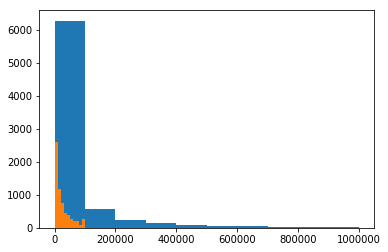

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 


plt.hist(artwork_transactions['eval_price'], range = (0,1000000))
plt.hist(artwork_transactions['eval_price'], range = (0,100000))


#### 售出率和估价等级

各个价位的售出率并没有差别

In [12]:
bins = np.arange(0,1000000,100000)
artwork_transactions['eval_price_cut'] = pd.cut(artwork_transactions['eval_price'], bins)
artwork_transactions.groupby(['eval_price_cut'])['ifsold'].mean()

eval_price_cut
(0, 100000]         0.665702
(100000, 200000]    0.735887
(200000, 300000]    0.732218
(300000, 400000]    0.761538
(400000, 500000]    0.687500
(500000, 600000]    0.638298
(600000, 700000]    0.685185
(700000, 800000]    0.791667
(800000, 900000]    0.647059
Name: ifsold, dtype: float64

#### 各艺术家 的 售出率

每位艺术家平均有2-3件作品拍卖，样本较少，所以艺术家的售出率不足以取信

In [13]:
len(artist_artworktransaction_dic)

2312869

In [14]:
def count_lables(column):
    lables = []
    for value in column:
        if value not in lables:
            lables.append(value)
    return len(lables)

count_lables(artwork_transactions['artist'])

3132

(array([  766.,     3.,    11.,    36.,    24.,   244.,   134.,    65.,
           72.,  1777.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

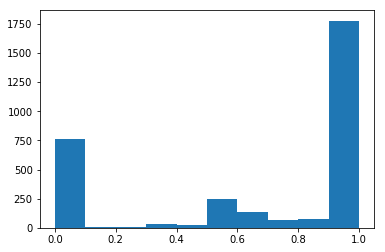

In [15]:
artist_ifsold_rate = artwork_transactions.groupby(['artist'])['ifsold'].mean()
plt.hist(artist_ifsold_rate)


#### 拍卖公司 和 拍卖会

首先，拍卖公司也许是相关的。

而拍卖会，平均每次拍卖会的艺术品也是小于十件，样本量过小。再次，待预测的艺术品一定来自于新的拍卖会，不具有可借鉴价值。

In [16]:
count_lables(artwork_transactions['company_id'])

523

(array([  79.,    6.,   15.,   18.,   17.,   84.,   66.,   58.,   52.,  128.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

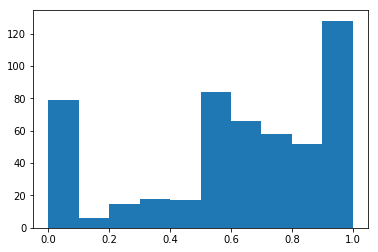

In [17]:
company_ifsold_rate = artwork_transactions.groupby(['company_id'])['ifsold'].mean()
plt.hist(company_ifsold_rate)

In [18]:
count_lables(artwork_transactions['auction_id'])

2697

(array([  502.,     4.,    41.,    80.,    19.,   363.,   194.,   127.,
          118.,  1249.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

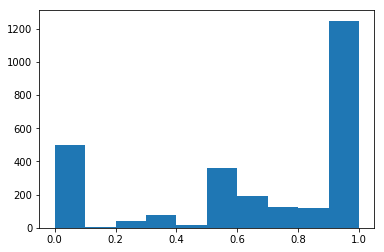

In [19]:
auction_ifsold_rate = artwork_transactions.groupby(['auction_id'])['ifsold'].mean()
plt.hist(auction_ifsold_rate)

#### 艺术品种类

In [20]:
artwork_transactions.groupby(['trans_art_type'])['ifsold'].mean()


trans_art_type
中国书画    0.677055
西画雕塑    0.716535
陶瓷      1.000000
Name: ifsold, dtype: float64

In [21]:
artwork_transactions.groupby(['trans_category'])['ifsold'].mean()


trans_category
nan         0.850000
书法          0.686703
当代艺术        0.750000
摄影          0.666667
水粉水彩        0.742857
油画          0.711628
版画          0.636364
现当代及其它瓷器    1.000000
素描          0.789474
绘画          0.673485
综合媒材        0.764706
装置          1.000000
西画雕塑其它      0.750000
雕塑          0.785714
Name: ifsold, dtype: float64

## 准备塞进分类器


In [24]:
from sklearn import preprocessing
def scale(data):
    X_train = data
    X_scaled = preprocessing.scale(X_train)

    return X_scaled                                          


In [25]:
attrib = ['eval_price',
          'eval_price_min',
          'eval_price_max',
          'trans_cantegory',
          'trans_art_type',
          'transaction_date',
          'auction_id', 
          'company_id',
          'artist']

In [26]:
artwork_transactions.drop(['lot'],axis=1,inplace=True)
artwork_transactions.drop(['updated_at'],axis=1,inplace=True)
artwork_transactions.drop(['created_at'],axis=1,inplace=True)
artwork_transactions.drop(['origin_url'],axis=1,inplace=True)
artwork_transactions.drop(['trade_channel_id'],axis=1,inplace=True)
artwork_transactions.drop(['info_update_time'],axis=1,inplace=True)
artwork_transactions.drop(['artwork_auction_name'],axis=1,inplace=True)
artwork_transactions.drop(['display_price'],axis=1,inplace=True)
artwork_transactions.drop(['trans_type'],axis=1,inplace=True)
artwork_transactions.drop(['id'],axis=1,inplace=True)
artwork_transactions.drop(['index'],axis=1,inplace=True)

ifsold = artwork_transactions['ifsold']
artwork_transactions.drop(['ifsold'],axis=1,inplace=True)
calc_price = artwork_transactions['calc_price']
artwork_transactions.drop(['calc_price'],axis=1,inplace=True)


In [27]:
category_attrib = ['trans_category', 'trans_art_type', 'auction_id', 'company_id, artist']

In [28]:
artwork_transactions['auction_id'] = artwork_transactions['auction_id'].astype(str)
artwork_transactions['company_id'] = artwork_transactions['company_id'].astype(str)
artwork_transactions['artist'] = artwork_transactions['artist'].astype(str)

In [29]:
serial_attrib = ['eval_price','eval_price_min','eval_price_max','transaction_date',]

In [30]:
artwork_transactions['eval_price'] = scale(artwork_transactions['eval_price'])
artwork_transactions['eval_price_min'] = scale(artwork_transactions['eval_price_min'])
artwork_transactions['eval_price_max'] = scale(artwork_transactions['eval_price_max'])
artwork_transactions['transaction_datee'] = scale(artwork_transactions['transaction_date'])

/Users/eva/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/eva/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [31]:
columns = []
for column_name in artwork_transactions:
    columns.append(artwork_transactions[column_name])

feature_tuple = list(zip(*columns))
feature_dic = [{k: v for k,v in zip(attrib, d)} for d in feature_tuple]

In [32]:
feature_dic

[{'artist': '1621',
  'auction_id': '1331',
  'company_id': '177',
  'eval_price': -0.12844207022931733,
  'eval_price_max': -0.12774207593656678,
  'eval_price_min': -0.12908553957723656,
  'trans_art_type': '西画雕塑',
  'trans_cantegory': '综合媒材',
  'transaction_date': 1389888000},
 {'artist': '47595',
  'auction_id': '2344',
  'company_id': '3',
  'eval_price': -0.025068993164811683,
  'eval_price_max': -0.020915687384819952,
  'eval_price_min': -0.030741218068038523,
  'trans_art_type': '中国书画',
  'trans_cantegory': '绘画',
  'transaction_date': 1335974400},
 {'artist': '8370',
  'auction_id': '3310',
  'company_id': '101',
  'eval_price': -0.13956579361933963,
  'eval_price_max': -0.13907273258957042,
  'eval_price_min': -0.1398955223785445,
  'trans_art_type': '中国书画',
  'trans_cantegory': '绘画',
  'transaction_date': 1274803200},
 {'artist': '20339',
  'auction_id': '1824',
  'company_id': '316',
  'eval_price': -0.11380982081690781,
  'eval_price_max': -0.11262101728663675,
  'eval_pric

In [33]:

from sklearn.feature_extraction import DictVectorizer
victorizer = DictVectorizer(sparse = True)
feature_matric = victorizer.fit_transform(feature_dic)
feature_matric = feature_matric.toarray()

In [34]:
def sperate_train_data(data):
    the_num_of_total_data = len(data)
    data_train = data[:int(the_num_of_total_data * 0.8)]
    data_test = data[int(the_num_of_total_data * 0.8):]
    return data_train, data_test

feature_train, feature_test = sperate_train_data(feature_matric)

In [35]:
feature_matric

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.38988800e+09],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.33597440e+09],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.27480320e+09],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.21432320e+09],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.12014720e+09],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.38634560e+09]])

In [36]:
label_train, label_test = sperate_train_data(ifsold)

In [37]:
from sklearn import tree
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeClassifier(min_samples_split=300)#(min_samples_split= 400)
dt = dt.fit(feature_train, label_train)
pred_dt = dt.predict(feature_test)
pred2_dt = dt.predict(feature_train)
print(accuracy_score(label_test, pred_dt), accuracy_score(label_train, pred2_dt))

0.660117878193 0.832077326343


In [38]:
importances = dt.feature_importances_
print(importances.argsort())

[   0 4134 4132 ..., 5864 6353 6372]


In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(feature_train, label_train)
pred_gnb = gnb.predict(feature_test)
pred2_gnb = gnb.predict(feature_train)
print(accuracy_score(label_test, pred_gnb), accuracy_score(label_train, pred2_gnb))

0.666011787819 0.683813892529
